In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sympy as sp

Enter any time-dependent function using variable 't'.
Examples:
  sin(2*pi*5*t)
  exp(-t**2)*cos(2*pi*5*t)
  exp(-t**2/(2*0.1**2))*cos(2*pi*5*t)  # Gaussian wave packet
------------------------------------------------------------


Enter function f(t):  exp(-t**2/(2*0.1**2))*cos(2*pi*5*t)


exp(-50.0*t**2)*cos(10*pi*t)


/Users/sudipta/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


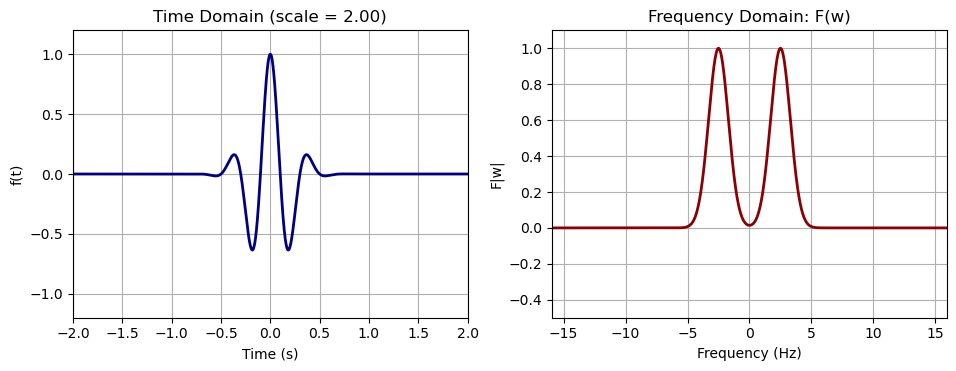

In [3]:
print("Enter any time-dependent function using variable 't'.")
print("Examples:")
print("  sin(2*pi*5*t)")
print("  exp(-t**2)*cos(2*pi*5*t)")
print("  exp(-t**2/(2*0.1**2))*cos(2*pi*5*t)  # Gaussian wave packet")
print("-" * 60)

# more example:
# -------------
# rectangular pulse: Piecewise((1, Abs(t) <= 0.5), (0, Abs(t) > 0.5))
# pulsed cosine: Piecewise((cos(t), Abs(t) <= 10), (0, Abs(t) > 10))
# one sided decay exponential:  Piecewise((exp(-1*t), t >= 0), (0, t < 0))
# double sided exponential: exp(-Abs(t))

func_str = input("Enter function f(t): ")

# --- Parse the function safely using sympy ---
t_sym = sp.Symbol('t', real=True)
try:
    expr = sp.sympify(func_str)
except Exception as e:
    raise ValueError(f"Could not parse expression: {e}")

print(expr)

# --- Convert symbolic expression to numerical function ---
f = sp.lambdify(t_sym, expr, modules=["numpy"])

# --- Time and frequency grids ---
t = np.linspace(-2, 2, 2000)
omega = np.linspace(-100, 100, 2000)
freq = omega / (2 * np.pi)

# --- Fourier transform function using numerical integration ---
def numerical_ft(f_t, t, omega):
    F_w = np.zeros_like(omega, dtype=complex)
    for i, w in enumerate(omega):
        integrand = f_t * np.exp(-1j * w * t)
        F_w[i] = np.trapz(integrand, t) #Trapezoidal rule for integration
    return F_w


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.tight_layout(pad=3)

line1, = ax1.plot([], [], color='navy', lw=2)
ax1.set_xlim(t[0], t[-1])
ax1.set_ylim(-1.2, 1.2)
ax1.set_title("Time Domain Signal")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("f(t)")
ax1.grid(True)

line2, = ax2.plot([], [], color='darkred', lw=2)
ax2.set_xlim(freq[0], freq[-1])
#ax2.set_xlim(-20, 20)
ax2.set_ylim(-0.5, 1.1)
ax2.set_title("Frequency Domain: F(w)")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("F|w|")
ax2.grid(True)


scales = np.linspace(0.1, 2.0, 60)  # time-scaling factors for animation

# --- Precomputing frames---
frames_data = []
for scale in scales:
    t_scaled = t / scale
    f_t = f(t_scaled)
    F_w = numerical_ft(f_t, t, omega)
    # Normalize for consistent plotting
    frames_data.append((f_t / np.max(np.abs(f_t)), F_w / np.max(np.abs(F_w))))
    #frames_data.append((f_t, F_w))
    #frames_data.append((f_t / np.max(np.abs(f_t)), np.abs(F_w) / np.max(np.abs(F_w)))) # for |F(w)|



def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

def update(frame):
    f_t_norm, F_w_norm = frames_data[frame]
    line1.set_data(t, f_t_norm)
    line2.set_data(freq, F_w_norm)
    ax1.set_title(f"Time Domain (scale = {scales[frame]:.2f})")
    return line1, line2

ani = FuncAnimation(fig, update, frames=len(scales),
                    init_func=init, blit=True, interval=100)

HTML(ani.to_jshtml())

Enter multiple time-dependent functions separated by commas using variable 't'.
Examples:
  sin(2*pi*5*t), 0.5*sin(2*pi*10*t), exp(-t**2)
  Piecewise((1, Abs(t)<=0.5),(0, Abs(t)>0.5)), cos(t), exp(-Abs(t))
------------------------------------------------------------


Enter functions f1(t), f2(t), ...:  sin(2*pi*5*t)



Combined signal:
sin(10⋅π⋅t)


/Users/sudipta/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


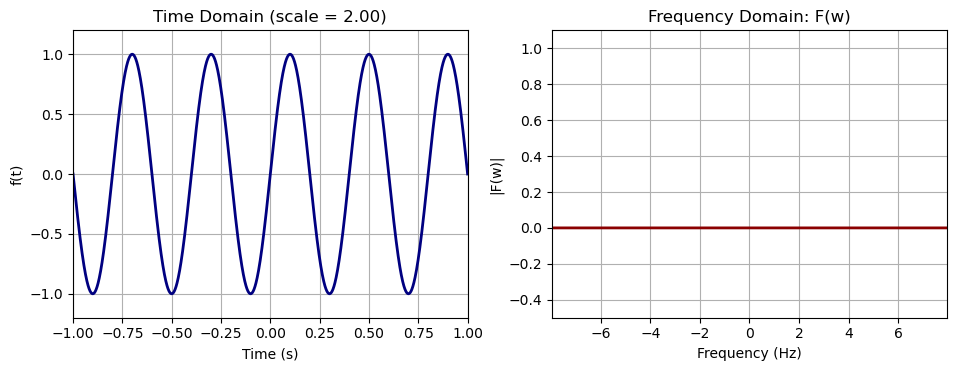

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sympy as sp

# --- Symbolic variable ---
t_sym = sp.Symbol('t', real=True)

# --- Ask user for multiple functions ---
print("Enter multiple time-dependent functions separated by commas using variable 't'.")
print("Examples:")
print("  sin(2*pi*5*t), 0.5*sin(2*pi*10*t), exp(-t**2)")
print("  Piecewise((1, Abs(t)<=0.5),(0, Abs(t)>0.5)), cos(t), exp(-Abs(t))")
print("-"*60)

func_str = input("Enter functions f1(t), f2(t), ...: ")

# --- Split the input by commas and parse each function ---
func_list = [s.strip() for s in func_str.split(',')]
expr_list = []
for func in func_list:
    try:
        expr_list.append(sp.sympify(func))
    except Exception as e:
        raise ValueError(f"Could not parse expression '{func}': {e}")

# --- Sum all functions ---
expr_total = sum(expr_list)
print("\nCombined signal:")
sp.pprint(expr_total)

# --- Convert to numerical function ---
f_total = sp.lambdify(t_sym, expr_total, modules=["numpy"])

# --- Time and frequency grids ---
t = np.linspace(-1, 1, 2000)
omega = np.linspace(-50, 50, 2000)
freq = omega / (2*np.pi)

# --- Numerical Fourier transform function ---
def numerical_ft(f_t, t, omega):
    F_w = np.zeros_like(omega, dtype=complex)
    for i, w in enumerate(omega):
        integrand = f_t * np.exp(-1j * w * t)
        F_w[i] = np.trapz(integrand, t)
    return F_w

# --- Animation setup ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.tight_layout(pad=3)

line1, = ax1.plot([], [], color='navy', lw=2)
ax1.set_xlim(t[0], t[-1])
ax1.set_ylim(-1.2, 1.2)
ax1.set_title("Time Domain Signal")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("f(t)")
ax1.grid(True)

line2, = ax2.plot([], [], color='darkred', lw=2)
ax2.set_xlim(freq[0], freq[-1])
ax2.set_ylim(-0.5, 1.1)
ax2.set_title("Frequency Domain: F(w)")
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("|F(w)|")
ax2.grid(True)

# --- Animation parameters ---
scales = np.linspace(0.1, 2.0, 60)  # time-scaling factors

# --- Precompute frames ---
frames_data = []
for scale in scales:
    t_scaled = t / scale
    f_t_vals = f_total(t_scaled)
    F_w_vals = numerical_ft(f_t_vals, t, omega)
    frames_data.append((f_t_vals / np.max(np.abs(f_t_vals)), 
                        F_w_vals / np.max(np.abs(F_w_vals))))

# --- Animation functions ---
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

def update(frame):
    f_t_norm, F_w_norm = frames_data[frame]
    line1.set_data(t, f_t_norm)
    line2.set_data(freq, F_w_norm)
    ax1.set_title(f"Time Domain (scale = {scales[frame]:.2f})")
    return line1, line2

ani = FuncAnimation(fig, update, frames=len(scales),
                    init_func=init, blit=True, interval=100)

HTML(ani.to_jshtml())
